In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# """
# Vamsi Chinta
# Machine Learning - Facial Recognition Project
# ResNet
# https://keras.io/examples/cifar10_resnet/
# """
#%% Importing Libraries ######################################################'


In [ ]:
path 			= r'/content/gdrive/My Drive/Colab_Datasets'
os.chdir(path)

seed 			= 7
np.random.seed(seed)

save_dir = os.path.join(os.getcwd(), 'NueralNetworksSavedModels')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
i 			= 0 #Revision Count

In [ ]:
from __future__ import print_function
import keras
from keras import backend as K
from keras import layers, models
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, Input, Flatten, Dropout
from keras.layers import LSTM#, sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from keras.preprocessing.image import img_to_array, load_img
from keras.regularizers import l2
from keras.models import Model
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
from sklearn.model_selection import ShuffleSplit, train_test_split
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import glob
import cv2
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import pydot
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import matplotlib.pyplot as plt
import h5py
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import warnings
warnings.filterwarnings("ignore")
#-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from PIL import Image

Using TensorFlow backend.


# Programme Code

In [ ]:
'Dataset PreProcessing'
df 			= pd.read_csv('Train_baseball.csv')
df['Image_Name'] 	= df['Image_Name'] + '.jpg'
'----'
test_size 		    = 0.05
validationSplit 	= 0.2
df_trn, df_tst 		= train_test_split(df, test_size=test_size, random_state=seed)
df_subtrn, df_val 	= train_test_split(df_trn, test_size=validationSplit, random_state=seed)
'----'
num_classes 		= 1
target_feature 		= 'Trustworthy_Score'
'Flow Parameters'
img_height         	= 128
img_width          	= 85
img_channels 		= 3
reshapeSize        	= (img_height, img_width)
input_shape 		= (img_height,img_width,img_channels)
#cardinality 		= 32
data_augmentation 	= True
subtract_pixel_mean 	= True # Subtracting pixel mean improves accuracy
'Generator Parameters'
rescale 		    = (1./255.)
normalization 		= True
xColName               	= 'Image_Name'
yColName	   	= 'Trustworthy_Score' 	                                #'Competency_Score'
batch_size 		= 32  	                                                # orig paper trained all networks with batch_size=128
interpolationMethod 	= 'nearest'                                             #Interpolation method used to resample the image if the target size is different from that of the loaded image.Supported methods are `"nearest"`, `"bilinear"`, and `"bicubic"`
'----'
dataType 		= 'float32'
shuffle 		= True
class_mode 		= 'other'
inputDirectory     	= './TrainPictures'
outputDirectory    	= './AugmentedPics/rev1'
color_mode 	 	= "rgb"
has_ext 		= False
'Training parameters'
n 			        = 3
depth 			    = n * 9 + 2 # depth (int): number of core convolutional layers
#version 		    = 2
'Compiling Parameters'
steps_per_epoch 	= df_subtrn.shape[0] // batch_size                         
valStepsPerEpoch 	= df_val.shape[0] // batch_size
loss 			    = 'mean_squared_error'
preformanceMetric	= 'accuracy'                                             #'mae  mean absolute error 	 	 	 	'accuracy'
optimizer 		    = 'Adam(lr=lr_schedule(0))' #not automated, just a placeholder!
'Fitting Parameters'
epochs 			    = 20
learning_rate 		= 0.002
steps_per_epoch 	= df_subtrn.shape[0] // batch_size                         #'steps_per_epoch'
valStepsPerEpoch 	= df_val.shape[0] // batch_size
tstStepsPerEpoch 	= len(df_tst)
'Residual Block Parameters'
first_num_filters_in	= 32 
resBlockActivationFn 	= 'relu'
denseActivationFn 	= 'linear'
denseKernelInitializer 	= 'he_normal'
'Residual Layers Parameters'
resLayerFilterNo 	= 32
resLayerKernelSize 	= 3
resLayerStrides 	= 1
resLayerActivation 	= 'relu'
batch_normalization 	= True
convLayerPadding 	= 'same'
convKernelInitializer 	= 'he_normal' # https://keras.io/initializers/
convKernelRegularizer 	= l2(1e-4)
'Visuals'
RevNo 			= i + 1
model_type 		= 'ResNet_Rev %dv%d' % (RevNo, depth)
print(model_type) 
monitor 		= 'val_acc'
verbose 		= 1
save_best_only 		= True
model_name 		= 'ResNet_%s_model.{epoch:03d}.h5' % model_type
filepath 		= os.path.join(save_dir, model_name)
# model.summary()

ResNet_Rev 1v29


Found 561 images.
Found 140 images.
Found 37 images.
Learning rate:  0.002
Epoch 1/20
Learning rate:  0.002
19/19 [==============================] - 28s 1s/step - loss: 7.8675 - acc: 0.0961 - val_loss: 7.0092 - val_acc: 0.0703

Epoch 00001: val_acc did not improve from 0.19444
Epoch 2/20
Learning rate:  0.002
19/19 [==============================] - 8s 439ms/step - loss: 4.9974 - acc: 0.1054 - val_loss: 7.1960 - val_acc: 0.0926

Epoch 00002: val_acc did not improve from 0.19444
Epoch 3/20
Learning rate:  0.002
19/19 [==============================] - 8s 438ms/step - loss: 4.8119 - acc: 0.1180 - val_loss: 4.6523 - val_acc: 0.1019

Epoch 00003: val_acc did not improve from 0.19444
Epoch 4/20
Learning rate:  0.002
19/19 [==============================] - 8s 439ms/step - loss: 4.7773 - acc: 0.0985 - val_loss: 3.9864 - val_acc: 0.1574

Epoch 00004: val_acc did not improve from 0.19444
Epoch 5/20
Learning rate:  0.002
19/19 [==============================] - 8s 441ms/step - loss: 4.7053 - ac

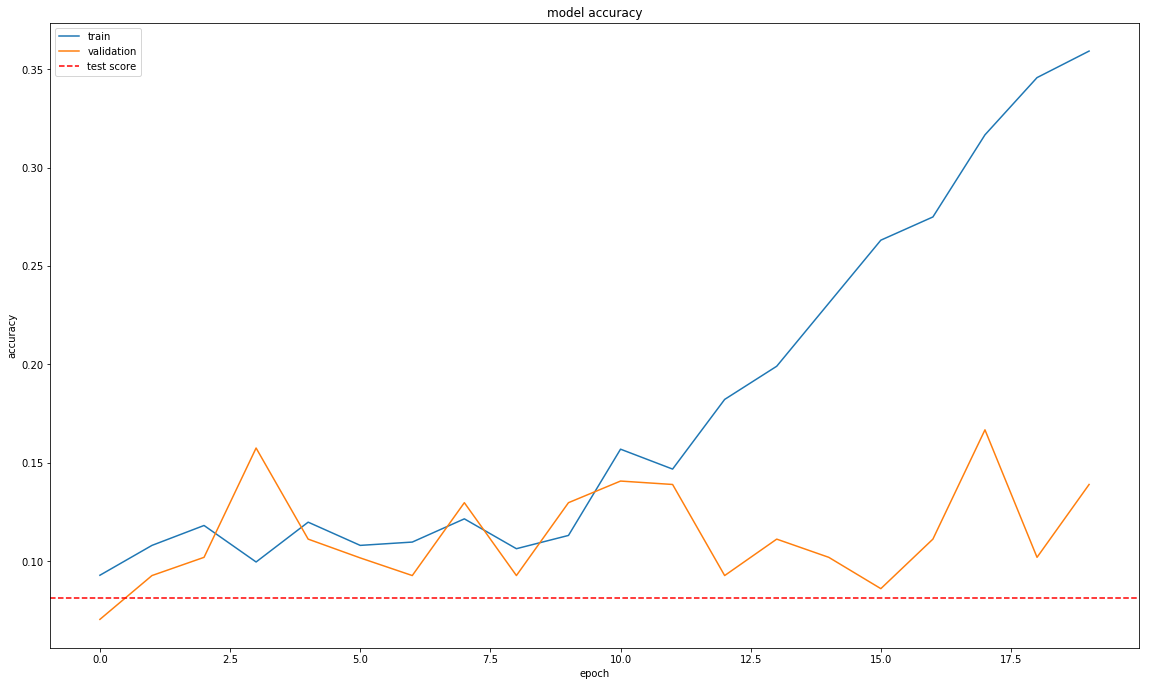

In [ ]:
'#%% configuring data-generators'
# https://keras.io/preprocessing/image/
dg_subtrn 	= ImgDataGen(rescale= rescale,\
			validation_split= validationSplit,\
			dtype = dataType,\
			featurewise_std_normalization = normalization)
dg_tst  	= ImgDataGen(rescale= rescale,\
		      dtype = dataType,\
		      featurewise_std_normalization = normalization)

'PreProcessing Training Dataset'
df_subtrn = dg_subtrn.flow_from_dataframe(dataframe = df_trn,\
				  directory = inputDirectory,\
				  x_col = xColName,\
				  y_col = yColName,\
				  batch_size = batch_size,\
				  seed = seed,\
				  shuffle = True,\
				  color_mode = color_mode,\
				  class_mode = class_mode,\
				  target_size = reshapeSize,\
				  has_ext = has_ext,\
				  subset = 'training',\
				  interpolation = interpolationMethod)#,\save_to_dir = outputDirectory)
'PreProcessing Validation Dataset'
df_val = dg_subtrn.flow_from_dataframe(dataframe = df_trn,\
					directory = inputDirectory,\
					x_col = xColName,\
					y_col= yColName,\
					batch_size = batch_size,\
					seed = seed,\
					shuffle = True,\
					color_mode = color_mode,\
					class_mode = class_mode,\
					target_size = reshapeSize,\
					has_ext = has_ext,\
					subset = 'validation',\
					interpolation = interpolationMethod)
'PreProcessing Test Dataset '
df_tst = dg_tst.flow_from_dataframe(dataframe = df_tst,\
					directory=inputDirectory,\
					x_col= xColName,\
					y_col= yColName,\
					batch_size=batch_size,\
					seed = seed,\
					shuffle=shuffle,\
					has_ext = has_ext,\
					class_mode=class_mode,\
					target_size=reshapeSize,\
					interpolation = interpolationMethod)

model = resnet_vv1(input_shape = input_shape,\
		           depth = depth)

model.compile(loss = loss,\
	      optimizer = Adam(lr=lr_schedule(0)),\
	      metrics = [preformanceMetric])

history = model.fit_generator(df_subtrn,\
                              steps_per_epoch = steps_per_epoch,\
                              epochs = epochs,\
                              validation_data = df_val,\
                              validation_steps = valStepsPerEpoch)

acc_tst = model.evaluate_generator(generator= df_tst,
				                    steps= tstStepsPerEpoch)

'#  "Accuracy" '
fig = plt.gcf()
fig.set_size_inches(19.5, 11.5)
fig.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.axhline(y=acc_tst[1], color='r', linestyle='--')
# -- -- -- --
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','test score'], loc='upper left')
plt.show()
# fig.savefig('test2png.png', dpi=100)

In [ ]:
def resnet_vv1(input_shape, depth, num_classes = num_classes):
	    if (depth - 2) % 9 != 0:
		    raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
	    
	    # Start model definition.
	    num_filters_in = first_num_filters_in
	    num_res_blocks = int((depth - 2) / 9)
	
	    inputs = Input(shape=input_shape)
	    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
	    x = resnet_layer(inputs=inputs,
	                     num_filters=num_filters_in,
	                     conv_first=True)
	
	    # Instantiate the stack of residual units
	    for stage in range(3):
	        for res_block in range(num_res_blocks):
	            activation = 'relu'
	            batch_normalization = True
	            strides = 1
	            if stage == 0:
	                num_filters_out = num_filters_in * 4
	                if res_block == 0:  	 	 	 	 	# first layer and first stage
	                    activation = None
	                    batch_normalization = False
	            else:
	                num_filters_out = num_filters_in * 2
	                if res_block == 0:  # first layer but not first stage
	                    strides = 2    # downsample
	
	            # bottleneck residual unit
	            y = resnet_layer(inputs=x,
	                             num_filters=num_filters_in,
	                             kernel_size=1,
	                             strides=strides,
	                             activation=activation,
	                             batch_normalization=batch_normalization,
	                             conv_first=False)
	            y = resnet_layer(inputs= y,
	                             num_filters=num_filters_in,
	                             conv_first=False)
	            y = resnet_layer(inputs=y,
	                             num_filters=num_filters_out,
	                             kernel_size=1,
	                             conv_first=False)
	            if res_block == 0:
	                # linear projection residual shortcut connection to match
	                # changed dims
	                x = resnet_layer(inputs=x,
	                                 num_filters=num_filters_out,
	                                 kernel_size=1,
	                                 strides=strides,
	                                 activation=None,
	                                 batch_normalization=False)
	            x = keras.layers.add([x, y])
	
	        num_filters_in = num_filters_out
	
	    # Add classifier on top.
	    # v2 has BN-ReLU before Pooling
	    x = BatchNormalization()(x)
	    x = Activation('relu')(x)
	    x = AveragePooling2D(pool_size=8)(x)
	    y = Flatten()(x)
	    outputs = Dense(num_classes,
	                    activation 			= denseActivationFn,
	                    kernel_initializer 		= denseKernelInitializer)(y)
	
	    # Instantiate model.
	    model = Model(inputs=inputs, outputs=outputs)
	    return model

    


Learning rate:  0.005


ValueError: ignored

In [ ]:
def lr_schedule(epoch):

    lr = learning_rate
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor = monitor,
                             verbose = verbose,
                             save_best_only = save_best_only) 			# Prepare callbacks for model saving and for learning rate adjustment.

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

In [ ]:
def resnet_layer(inputs,
                 num_filters = resLayerFilterNo,
                 kernel_size = resLayerKernelSize,
                 strides = resLayerStrides,
                 activation = resLayerActivation,
                 batch_normalization = batch_normalization,
                 conv_first=True):

    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding=convLayerPadding,
                  kernel_initializer = convKernelInitializer,
                  kernel_regularizer = convKernelRegularizer)

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x) 	# Adding Batchnorma
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

# Visuals


In [ ]:
plot_model(model, to_file='./ResnetModel.png',\
	   show_shapes=True,\
	   show_layer_names=True,\
	   rankdir='LR')